In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns            
import warnings 
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Customer Churn.csv")

# CHURN

In [3]:
df.info() # tenure is in months

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [5]:
df["TotalCharges"].value_counts()

TotalCharges
          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: count, Length: 6531, dtype: int64

# Replacing blanks with 0 as tenure is 0 and 11 totalcharges rows has NO values.

In [6]:
# changing TotalCharges column's BLANK values to 0. and it's zero bez these customers have started resently only.
df["TotalCharges"] = df["TotalCharges"].replace(" ", "0")
df["TotalCharges"] = df["TotalCharges"].astype("float")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [9]:
df.duplicated().sum()

0

In [10]:
df["customerID"].duplicated().sum()

0

In [11]:
#Concluding so far ==> 
# there are no duplicate values are present in this dataset. also checked based on df["customerID"].duplicated().sum().
# performed df.info() and found out there are some columns where we need to change their datatypes as well as values.

# Now changing df["SeniorCitizen"] values from 0/1  to  no/yes bez other column's values are in yes/no format.

In [12]:
def conv(value):
    if value  == 1 :
        return "yes"
    else:
        return "no" 

In [13]:
df["SeniorCitizen"] = df["SeniorCitizen"].apply(conv)

# 1)  First understanding how many people have churned out.

In [14]:
# Task 1 
# First understanding how many people have churned out.
df["Churn"].value_counts() / df["Churn"].shape[0] * 100

Churn
No     73.463013
Yes    26.536987
Name: count, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

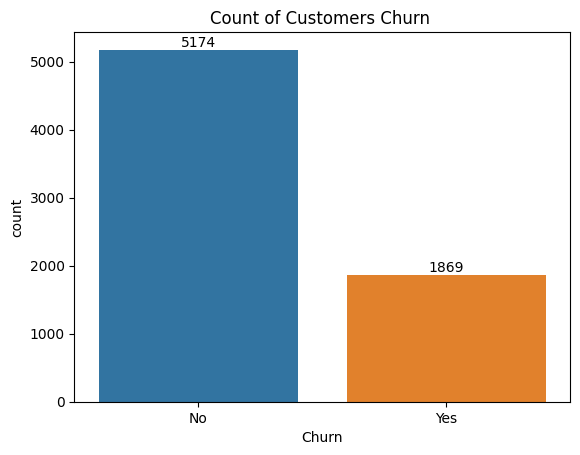

In [15]:

ax = sns.countplot(data = df , x = "Churn")
ax.bar_label(ax.containers[0]) 
plt.title("Count of Customers Churn ")
plt.show

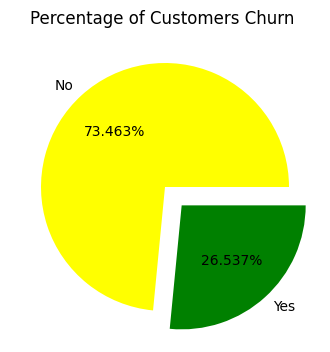

In [16]:
plt.figure(figsize = (4,5))
gb = df.groupby("Churn").agg({"customerID":"count"})
plt.pie(gb["customerID"] , labels = gb.index, explode = [0,0.2], autopct = "%1.3f%%" , colors = ["yellow" ,"green"])
plt.title("Percentage of Customers Churn ")
plt.show()


# CONCLUSION 
# After reading pie chart and CountPlot we can conclude that 26.54% of our customers have "CHURNED OUT".


# Now Let's find out why they are leaving our services/platform.

In [17]:
# Based On "GENDER"

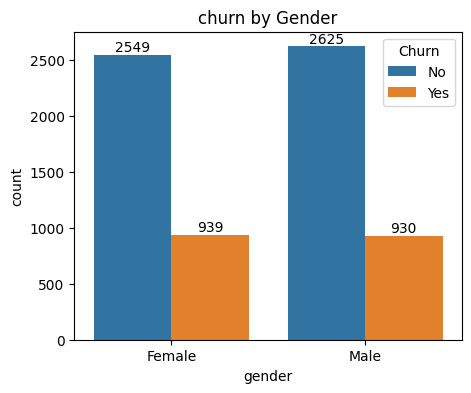

In [18]:
plt.figure(figsize = (5,4))
ax = sns.countplot(x = df["gender"], data = df, hue = "Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("churn by Gender")
plt.show()

# Creating A Piechart To Understand How Many percentage of SeniorCitizen are there!!

               customerID
SeniorCitizen            
no                   5901
yes                  1142




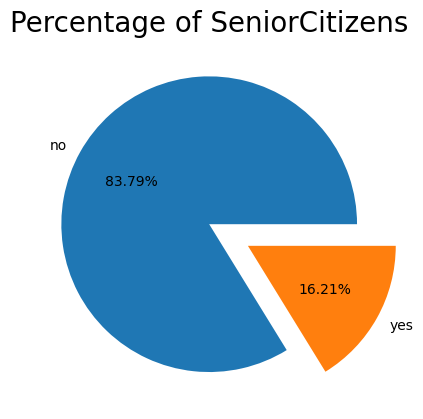

In [20]:
gb = df.groupby("SeniorCitizen").agg({"customerID":"count"})
print(gb)
print()
print()
plt.pie(gb["customerID"], labels = gb.index, autopct = "%1.2f%%", explode = [0,0.3])
plt.title("Percentage of SeniorCitizens", fontsize = 20)
plt.show()

In [21]:
a  = pd.crosstab(df["Churn"],df["SeniorCitizen"]).apply(lambda r : round(r/sum(r) * 100 , 1), axis = 0)

In [22]:
# remember axis = 1 ==> Row , axis =0 ===> Columns

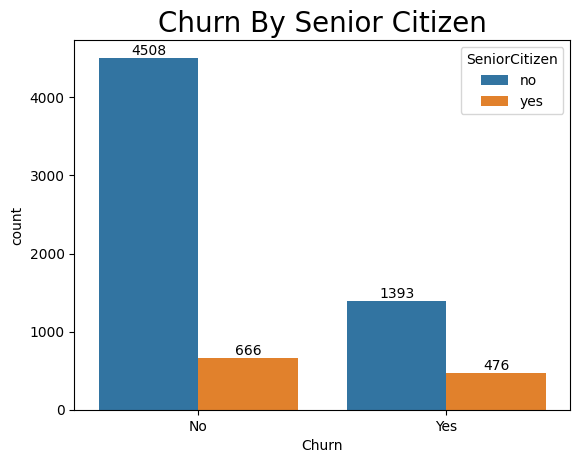

In [23]:
ax = sns.countplot(data = df , x = "Churn" , hue = "SeniorCitizen")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Churn By Senior Citizen", fontsize = 20)
plt.show()

# Conclusion based on SeniorCitizen vs Churn 

In [24]:

f"we can conclude that, {round(a.values[1][0],1)} % people are churned out who are not SeniorCitizen and {round(a.values[1][1],1)} % people are Churned out who are SeniorCitizen"



'we can conclude that, 23.6 % people are churned out who are not SeniorCitizen and 41.7 % people are Churned out who are SeniorCitizen'

In [25]:
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


# Based on Tenure

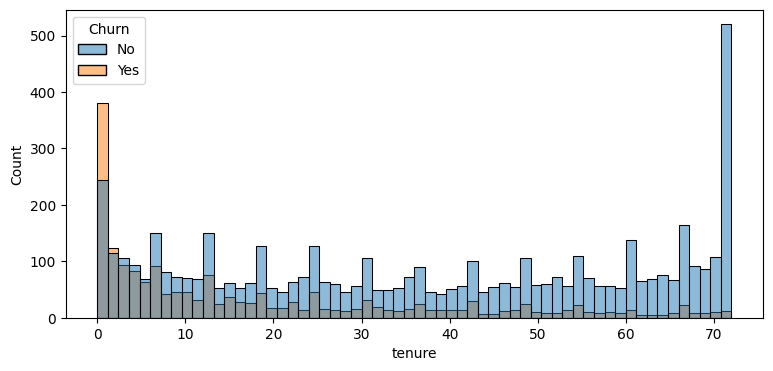

In [26]:
# df["tenure"].describe()
plt.figure(figsize = (9,4))
sns.histplot(data=df, x ="tenure", bins = 60, hue = "Churn" ,color = ["red", "green"])
plt.show()

# we can conclude from above histplot that people have churned out those who have tenure between 0 to 3 months 

In [41]:
# why they are even leaving our platform? 26.54% ? 
# lets check contract column

In [44]:
df["Contract"].value_counts()

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

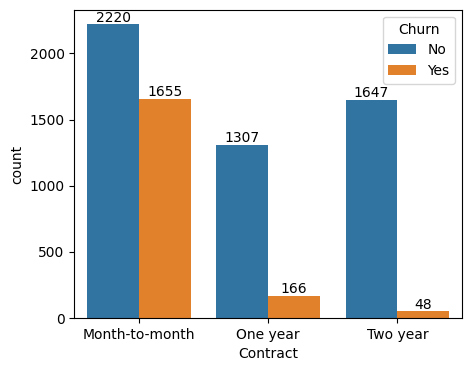

In [81]:
plt.figure(figsize = (5,4))
ax = sns.countplot(data =df , x = "Contract", hue="Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

# conclusion 
# People who have Month-to-Month contract are likely to churn than other contracts

In [87]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

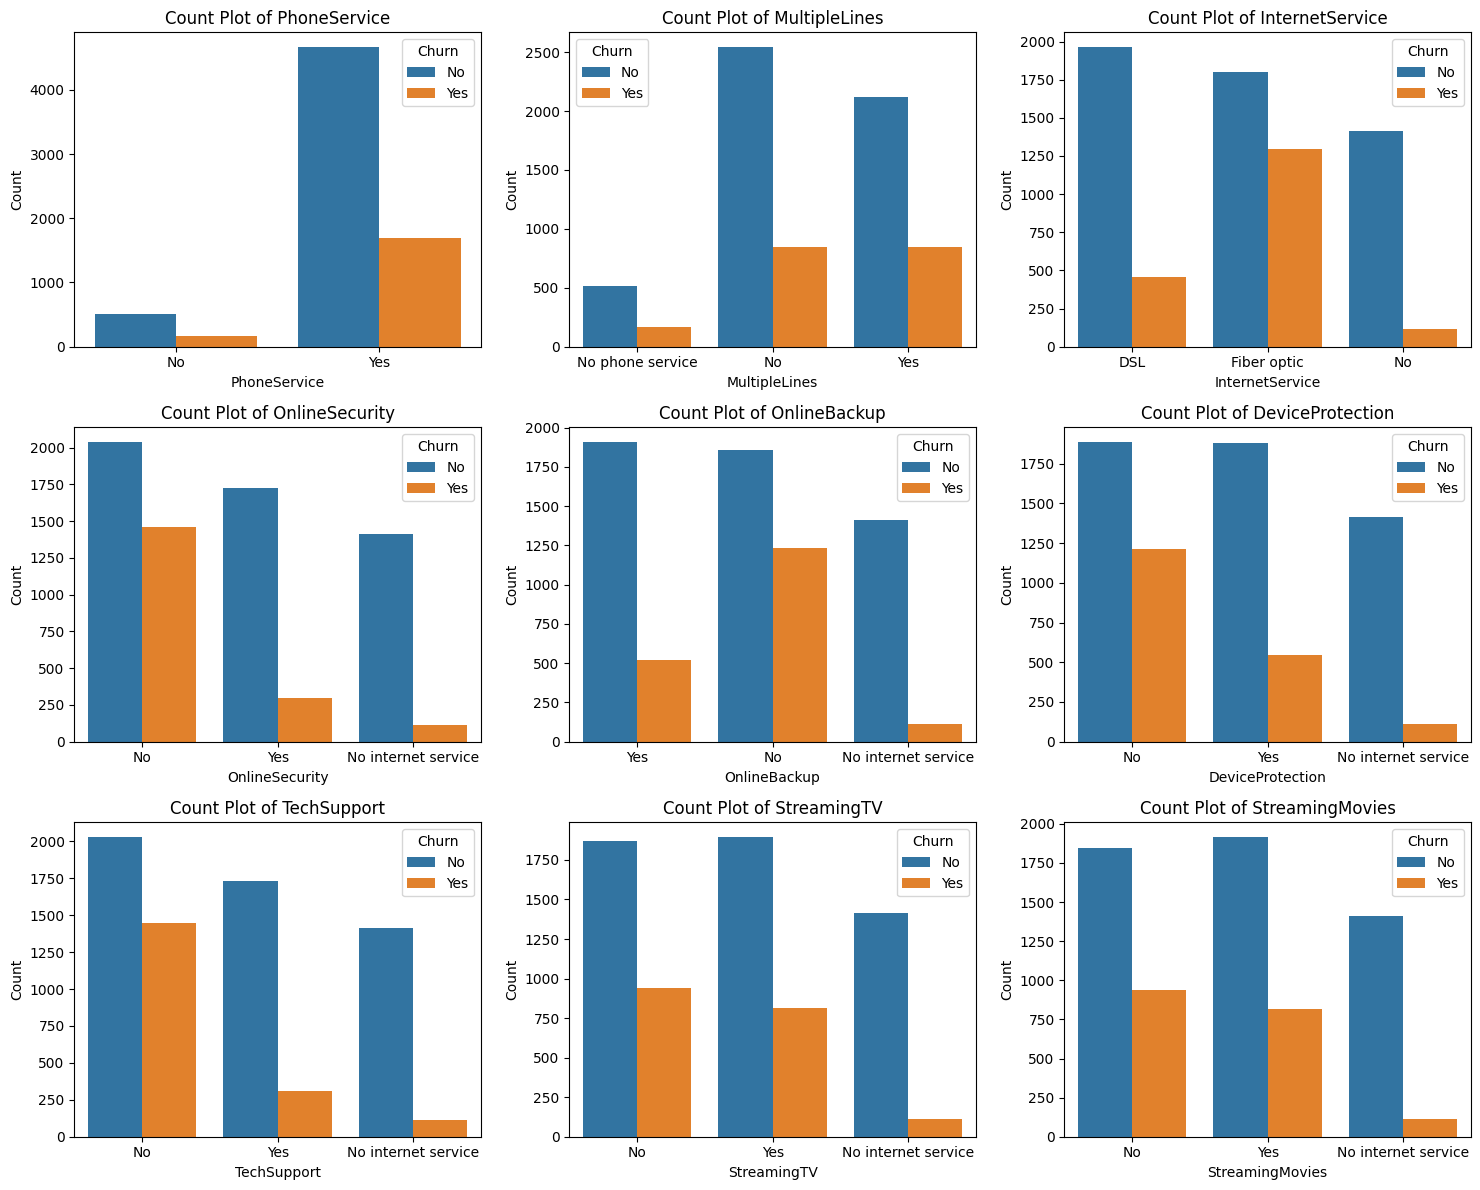

In [88]:
columns = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
           'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Number of columns for the subplot grid (you can change this)
n_cols = 3
n_rows = (len(columns) + n_cols - 1) // n_cols  # Calculate number of rows needed

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))  # Adjust figsize as needed

# Flatten the axes array for easy iteration (handles both 1D and 2D arrays)
axes = axes.flatten()

# Iterate over columns and plot count plots
for i, col in enumerate(columns):
    sns.countplot(x=col, data=df, ax=axes[i], hue = df["Churn"])
    axes[i].set_title(f'Count Plot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

# Remove empty subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

 # It appears that customers with no access to services like InternetService, TechSupport, or StreamingTV have a higher churn rate compared to those who use these services

In [90]:
# checking with PaymentMethod columns

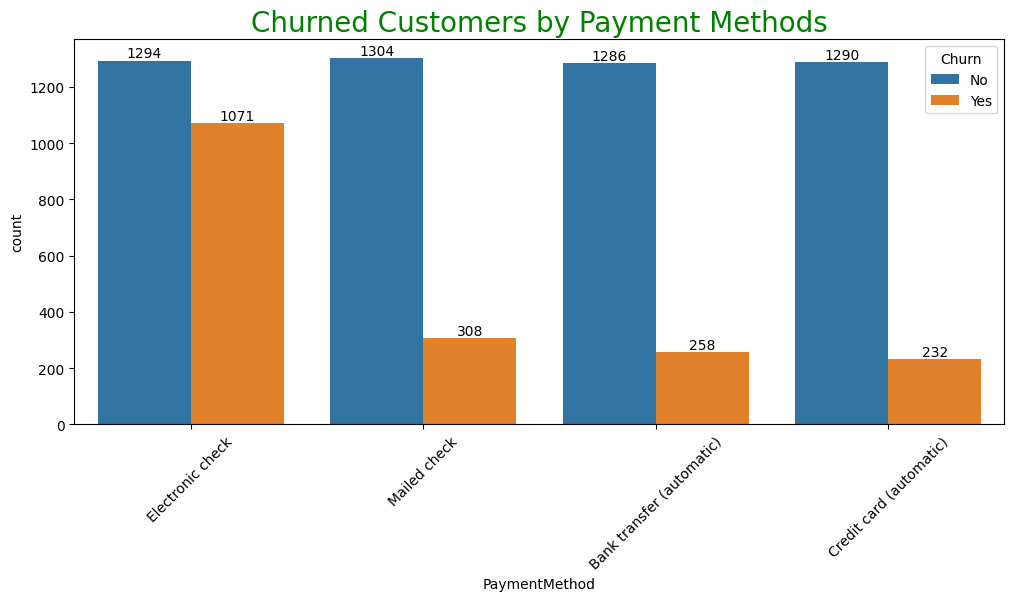

In [109]:
plt.figure(figsize = (12,5))
ax = sns.countplot(data =df, x = df["PaymentMethod"], hue = "Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.xticks(rotation = 45,fontsize = 10)
plt.title("Churned Customers by Payment Methods", fontsize = 20, color = "green")
plt.show()

# It has observed that the people who are using Electronic check they churning out majoritively as compare to Automatic methods like Bank transfer,Credit card

<Axes: xlabel='MonthlyCharges', ylabel='Count'>

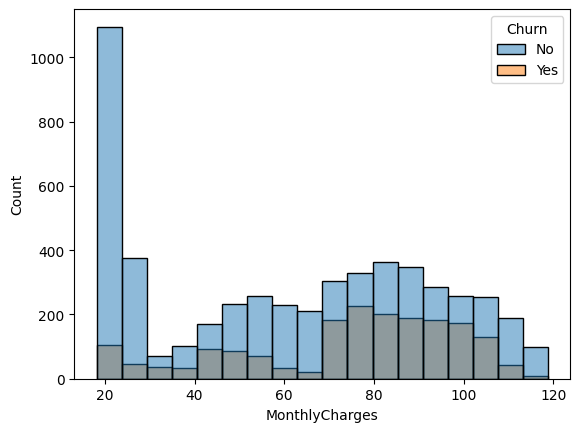

In [111]:
sns.histplot(data = df , x = df["MonthlyCharges"],hue = "Churn")

# The histogram shows that customers with higher monthly charges are more likely to churn. The highest bar for churned customers is in the 80-90 range, while the highest bar for non-churning customers is in the 20-30 range.

# END_OF_THE_PROJECT